C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5359 samples, validate on 2641 samples
Epoch 1/30
5359/5359 [==============================] - 1s 145us/step - loss: 0.6659 - accuracy: 0.6055 - val_loss: 0.6331 - val_accuracy: 0.6475
Epoch 2/30
5359/5359 [==============================] - 0s 30us/step - loss: 0.5974 - accuracy: 0.7063 - val_loss: 0.5865 - val_accuracy: 0.7368
Epoch 3/30
5359/5359 [==============================] - 0s 30us/step - loss: 0.5641 - accuracy: 0.7548 - val_loss: 0.5609 - val_accuracy: 0.7618
Epoch 4/30
5359/5359 [==============================] - 0s 30us/step - loss: 0.5439 - accuracy: 0.7770 - val_loss: 0.5445 - val_accuracy: 0.7736
Epoch 5/30
5359/5359 [==============================] - 0s 30us/step - loss: 0.5299 - accuracy: 0.7862 - val_loss: 0.5323 - val_accuracy: 0.7834
Epoch 6/30
5359/5359 [==============================] - 0s 30us/step - loss: 0.5189 - accuracy: 0.7921 - val_loss: 0.5230 - val_accuracy: 0.7880
Epoch 7/30
5359/5359 [==============================] - 0s 30us/step - loss: 0.51

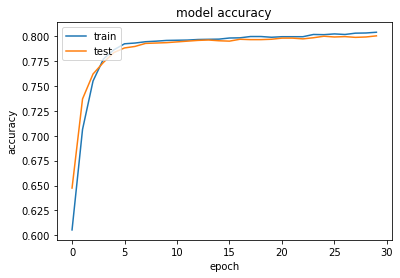

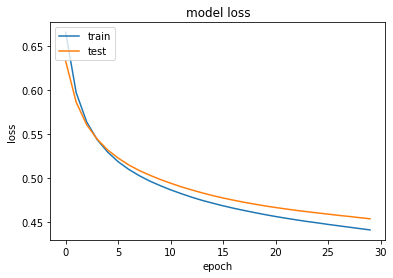

In [28]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100, nb_epoch = 30)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)

y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
